In [4]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [11]:
df = df.rename(columns={'Gender':'gender', 'Age':'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)':'spending_score'})

df ['gender'].replace(['Female','Male'],[0,1], inplace = True)
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6


In [ ]:
from sklearn.cluster import KMeans
x = df.drop(['CustomerID','gender'], axis =1)

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(x)
  clusters.append(km.inertia_)


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize =(8,4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


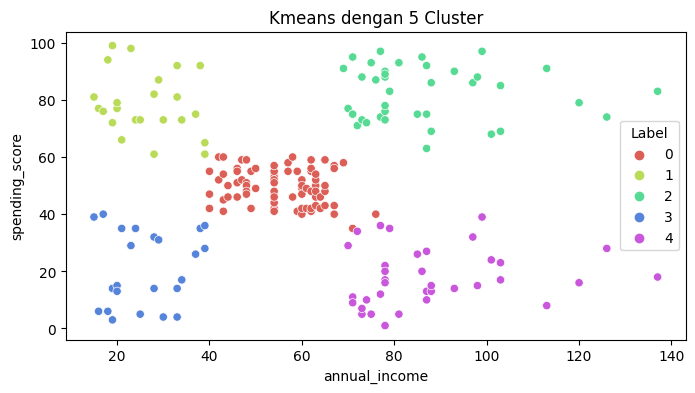

In [36]:
km5 = KMeans(n_clusters=5).fit(x)
x ['Label'] = km5.labels_

plt.figure(figsize=(8,4))
sns.scatterplot(x=x['annual_income'], y=x['spending_score'], hue=x['Label'],
                 palette=sns.color_palette('hls', 5))
plt.title('Kmeans dengan 5 Cluster')
plt.show()